# `Soundscapy` - Quick Start Guide

By Andrew Mitchell, Lecturer, University College London

## Background

`Soundscapy` is a python toolbox for analysing quantitative soundscape data. Urban soundscapes are typically assessed through surveys which ask respondents how they perceive the given soundscape. Particularly when collected following the technical specification ISO 12913, these surveys can constitute quantitative data about the soundscape perception. As proposed in *How to analyse and represent quantitative soundscape data* [(Mitchell, Aletta, & Kang, 2022)](https://asa.scitation.org/doi/full/10.1121/10.0009794), in order to describe the soundscape perception of a group or of a location, we should consider the distribution of responses. `Soundscapy`'s approach to soundscape analysis follows this approach and makes it simple to process soundscape data and visualise the distribution of responses. 

For more information on the theory underlying the assessments and forms of data collection, please see ISO 12913-Part 2, *The SSID Protocol* [(Mitchell, *et al.*, 2020)](https://www.mdpi.com/2076-3417/10/7/2397), and *How to analyse and represent quantitative soundscape data*.

## This Notebook

The purpose of this notebook is to give a brief overview of how `Soundscapy` works and how to quickly get started using it to analyse your own soundscape data. The example dataset used is *The International Soundscape Database (ISD)* (Mitchell, *et al.*, 2021), which is publicly available at [Zenodo](https://zenodo.org/record/6331810) and is free to use. `Soundscapy` expects data to follow the format used in the ISD, but can be adapted for similar datasets.

----------

## Installation

To install Soundscapy with `pip`:

```
pip install soundscapy
```

----

## Working with Data

### Loading and Validating Data

Let's start by importing Soundscapy and loading the International Soundscape Database (ISD):


In [16]:
from soundscapy import setup_logging

setup_logging("WARNING")

In [17]:
# Import Soundscapy
import soundscapy as sspy
from soundscapy.databases import isd

# Load the ISD dataset
df = isd.load()
print(df.shape)

# Validate the dataset with ISD-custom checks
df, excl = isd.validate(df)
print(f"Valid samples: {df.shape[0]}, Excluded samples: {excl.shape[0]}")

(3589, 142)
Valid samples: 3533, Excluded samples: 56


### Calculating ISOPleasant and ISOEventful Coordinates

Next, we'll calculate the ISOCoordinate values:

In [18]:
df = sspy.surveys.add_iso_coords(df)
df[["ISOPleasant", "ISOEventful"]].head()

,ISOPleasant,ISOEventful
0,0.219670,-0.133883
1,-0.426777,0.530330
2,0.676777,-0.073223
3,0.603553,-0.146447
4,0.457107,-0.146447


`Soundscapy` expects the PAQ values to be Likert scale values ranging from 1 to 5 by default, as specified in ISO 12913 and the SSID Protocol. However, it is possible to use data which, although structured the same way, has a different range of values. For instance this could be a 7-point Likert scale, or a 0 to 100 scale. By passing these numbers both to `validate_dataset()` and `add_paq_coords()` as the `val_range`, `Soundscapy` will check that the data conforms to what is expected and will automatically scale the ISOCoordinates from -1 to +1 depending on the original value range. 

For example:

In [19]:
import pandas as pd

val_range = (0, 100)
sample_transform = {
    "RecordID": ["EX1", "EX2"],
    "pleasant": [40, 25],
    "vibrant": [45, 31],
    "eventful": [41, 54],
    "chaotic": [24, 56],
    "annoying": [8, 52],
    "monotonous": [31, 55],
    "uneventful": [37, 31],
    "calm": [40, 10],
}
sample_transform = pd.DataFrame().from_dict(sample_transform)
sample_transform = sspy.surveys.rename_paqs(sample_transform)
sample_transform = sspy.surveys.add_iso_coords(sample_transform, val_range=val_range)
sample_transform

,RecordID,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,ISOPleasant,ISOEventful
0,EX1,40,45,41,24,8,31,37,40,0.220416,0.010711
1,EX2,25,31,54,56,52,55,31,10,-0.316863,0.159706


### Filtering Data

`Soundscapy` includes methods for several filters that are normally needed within the ISD, such as filtering by `LocationID` or `SessionID`.

In [20]:
# Filter by location
camden_data = isd.select_location_ids(df, ["CamdenTown"])
print(f"Camden Town samples: {camden_data.shape[0]}")

# Filter by session
regent_data = isd.select_session_ids(df, ["RegentsParkJapan1"])
print(f"Regent's Park Japan session 1 samples: {regent_data.shape[0]}")

# Complex filtering using pandas query
women_over_50 = df.query("gen00 == 'Female' and age00 > 50")
print(f"Women over 50: {women_over_50.shape[0]}")

Camden Town samples: 105
Regent's Park Japan session 1 samples: 45
Women over 50: 133


All of these filters can also be chained together. So, for instance, to return surveys from women over 50 taken in Camden Town, we would do:

In [21]:
isd.select_location_ids(df, "CamdenTown").query("gen00 == 'Female' and age00 > 50")

,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,THD_THD_Max,THD_Min_Max,THD_Max_Max,THD_L5_Max,THD_L10_Max,THD_L50_Max,THD_L90_Max,THD_L95_Max,ISOPleasant,ISOEventful
58,CamdenTown,CamdenTown1,CT108,531,2019-05-02 12:10:52,2019-05-02 12:26:45,51.539124,-0.142624,eng,engISO2018,...,-2.12,-4.44,72.28,45.05,37.19,13.40,-1.88,-2.45,-1.464466e-01,0.146447
63,CamdenTown,CamdenTown1,CT111,533,2019-05-02 12:29:42,2019-05-02 12:58:56,51.539124,-0.142624,eng,engISO2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.142136e-01,-0.457107
104,CamdenTown,CamdenTown3,CT311,593,2019-05-20 12:24:14,2019-05-20 12:28:27,51.539124,-0.142624,eng,engISO2018,...,-4.73,-8.48,76.20,44.21,34.12,11.04,-4.83,-5.99,-1.464466e-01,0.146447
105,CamdenTown,CamdenTown3,CT311,623,2019-05-20 12:25:00,2019-05-20 12:30:00,51.539124,-0.142624,eng,engISO2018,...,-4.73,-8.48,76.20,44.21,34.12,11.04,-4.83,-5.99,1.338835e-01,0.073223
122,CamdenTown,CamdenTown3,CT324,609,2019-05-20 13:51:00,2019-05-20 13:57:00,51.539124,-0.142624,eng,engISO2018,...,-1.53,-9.57,75.83,43.30,33.73,11.88,-5.59,-7.44,1.767767e-01,0.926777
128,CamdenTown,CamdenTown3,CT328,617,2019-05-20 14:13:00,2019-05-20 14:16:00,51.539124,-0.142624,eng,engISO2018,...,-5.89,-1.76,71.56,45.97,38.80,17.59,2.64,1.16,-4.393398e-01,0.250000
132,CamdenTown,CamdenTown4,CT403,1220,2019-07-13 12:31:40,2019-07-13 12:35:30,51.539140,-0.142648,eng,engISO2018,...,-1.32,-3.24,71.78,49.81,42.16,16.53,0.54,-0.65,-4.598694e-17,0.603553


## Plotting

Soundscapy offers various plotting functions to visualize soundscape data. The plotting system is built on Seaborn's Objects API, providing a flexible and composable way to create plots. Let's explore some examples:

### Scatter plots

In [22]:
import matplotlib.pyplot as plt
import seaborn.objects as so

from soundscapy.plotting import (
    scatter_plot,
    SoundscapeCircumplex,
    SoundscapeQuadrantLabels,
)

# Basic scatter plot using function-based API
# ax = scatter_plot(
#     isd.select_location_ids(df, ["RussellSq"]),
#     title="RussellSq"
# )
# plt.show()

# # Customized scatter plot with multiple locations
# ax = scatter_plot(
#     isd.select_location_ids(df, ["RussellSq", "EustonTap"]),
#     hue="LocationID",
#     title="Russell Square vs. Euston Tap",
#     diagonal_lines=True,
#     point_size=40,
#     alpha=0.8
# )
# plt.show()

# Direct composition with Seaborn Objects API
locations_data = isd.select_location_ids(df, ["RussellSq", "CamdenTown", "PancrasLock"])
plot = (
    so.Plot(locations_data, x="ISOPleasant", y="ISOEventful")
    .add(so.Dots(), color="LocationID")
    .add(SoundscapeCircumplex())  # Add circumplex grid
    .add(SoundscapeQuadrantLabels())  # Add diagonal lines and labels
    .scale(color=so.Nominal("husl"))  # Custom color palette
    .label(title="Composed plot with Seaborn Objects")
)
plot

TypeError: SoundscapeCircumplex._plot() missing 1 required positional argument: 'y'

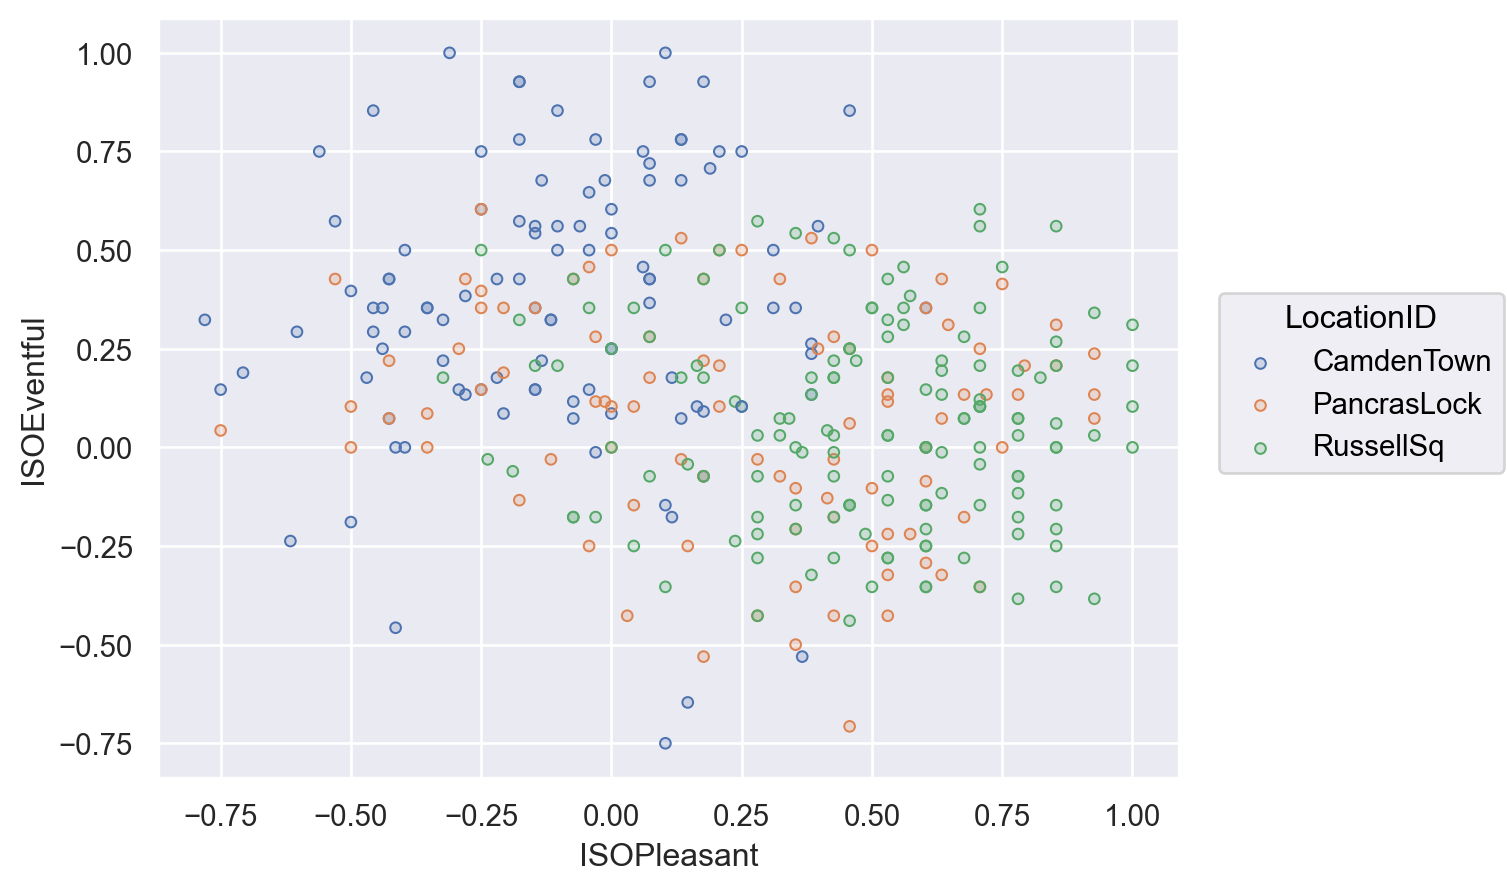

In [23]:
plot = so.Plot(locations_data, x="ISOPleasant", y="ISOEventful").add(
    so.Dots(), color="LocationID"
)
plot.add(SoundscapeCircumplex())  # Add circumplex grid
plot

### Density plots

In [24]:
from soundscapy.plotting import density_plot, SoundscapeCoordinates

# Single density plot
density_plot(
    isd.select_location_ids(df, ["CamdenTown"]),
    title="Camden Town Density plot",
    alpha=0.7,
)
plt.show()

# Density comparisons with simple density and scatter points
density_plot(
    isd.select_location_ids(df, ["CamdenTown", "RussellSq", "PancrasLock"]),
    hue="LocationID",
    title="Comparison of the soundscapes of three urban spaces",
    palette="husl",
    simple_density=True,
    incl_scatter=True,
    diagonal_lines=True,
)
plt.show()

# Using Seaborn Objects API for custom density plots
camden_data = isd.select_location_ids(df, ["CamdenTown"])
custom_density = (
    so.Plot(camden_data, x="ISOPleasant", y="ISOEventful")
    .add(
        so.Area(alpha=0.5, fill=True), so.KDE(bw_adjust=1.2, levels=8)
    )  # Density contours
    .add(so.Line(alpha=1.0), so.KDE(bw_adjust=1.2, levels=8))  # Outline
    .add(so.Dots(pointsize=20, alpha=0.6))  # Scatter points
    .add(SoundscapeCircumplex())  # Grid
    .label(title="Custom density plot with Objects API")
)
custom_density.show()

TypeError: KDE.__init__() got an unexpected keyword argument 'levels'

### Joint plots

Joint plots combine scatter plots or density plots with marginal distributions:

In [ ]:
from soundscapy.plotting import joint_plot

# Create a joint plot with kde in the main plot
g = joint_plot(
    isd.select_location_ids(df, ["CamdenTown"]),
    kind="kde",
    title="Camden Town Joint Plot",
    diagonal_lines=True,
)
plt.show()

### Creating subplots

Soundscapy provides a function for creating multiple circumplex plots in a grid layout. This is particularly useful when comparing multiple locations:

In [ ]:
df["LocationID"].unique()

In [ ]:
from soundscapy.plotting import create_circumplex_subplots

# Create a grid of density plots for multiple locations
locations = df["LocationID"].unique()[9:13]
data_list = [sspy.isd.select_location_ids(df, loc) for loc in locations]

fig = create_circumplex_subplots(
    data_list,
    plot_type="density",
    cols=2,
    incl_scatter=True,
    subtitles=locations,
    title="Density plots of four locations",
    diagonal_lines=True,
)
plt.show()

You can also create custom subplots with more control by creating and customizing each plot individually:

In [ ]:
from soundscapy.plotting import scatter_plot, density_plot

# Create a grid of custom plots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Scatter plot in top-left
scatter_plot(
    isd.select_location_ids(df, "CamdenTown"),
    title="Camden Town (Scatter)",
    diagonal_lines=True,
    ax=axes[0, 0],
)

# Density plot in top-right
density_plot(
    isd.select_location_ids(df, "RussellSq"),
    title="Russell Square (Density)",
    simple_density=True,
    ax=axes[0, 1],
)

# Scatter plot with hue in bottom-left
scatter_plot(
    isd.select_location_ids(df, "EustonTap"),
    hue="SessionID",
    title="Euston Tap (Sessions)",
    ax=axes[1, 0],
)

# Density with scatter in bottom-right
density_plot(
    isd.select_location_ids(df, "PancrasLock"),
    title="Pancras Lock (Density + Scatter)",
    incl_scatter=True,
    diagonal_lines=True,
    ax=axes[1, 1],
)

plt.tight_layout()
plt.show()

### Advanced Customization with Seaborn Objects

For more advanced customization, you can use the Seaborn Objects API directly with Soundscapy's custom components:

TypeError: SoundscapeCircumplex._plot() missing 1 required positional argument: 'y'

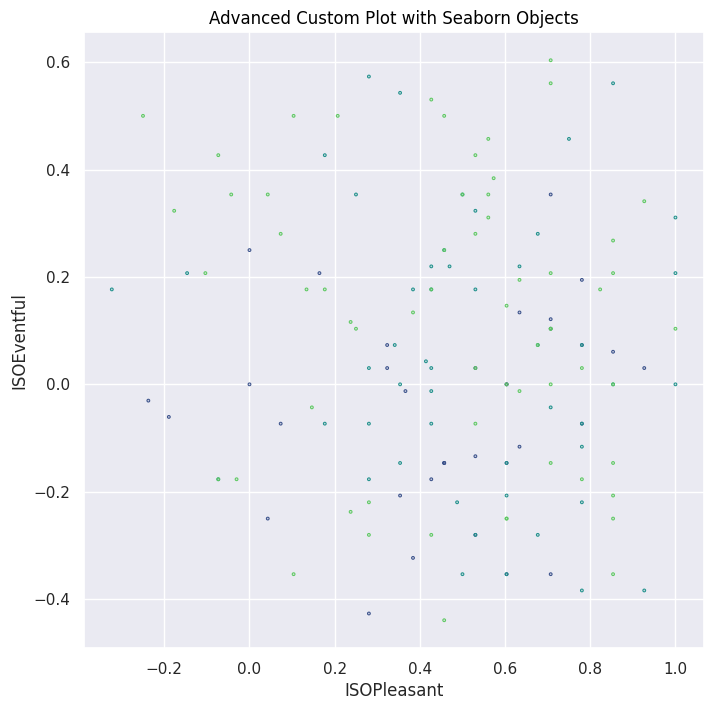

In [27]:
import numpy as np
from soundscapy.plotting import (
    SoundscapeCircumplex,
    SoundscapeQuadrantLabels,
    SoundscapePointAnnotation,
    add_calculated_coords,
    use_soundscapy_style,
)

# Apply the Soundscapy style
use_soundscapy_style()

# Get data for one location
russell_sq = isd.select_location_ids(df, ["RussellSq"])

# Create a custom plot with multiple layers
custom_plot = (
    so.Plot(russell_sq, x="ISOPleasant", y="ISOEventful")
    # Add scatter points
    .add(so.Dots(marker="."), color="SessionID")
    .scale(color=so.Nominal("viridis"))
    # Add circumplex grid with custom styling
    .add(
        SoundscapeCircumplex(
            primary_color="darkblue", primary_alpha=0.8, grid_color="lightgray"
        )
    )
    # Add quadrant labels with custom styling
    .add(
        SoundscapeQuadrantLabels(
            line_color="darkblue", line_alpha=0.5, label_color="darkblue", label_size=10
        )
    )
    # Add an annotation for the point closest to the center
    .add(
        SoundscapePointAnnotation(
            points=[0],  # First point in the data
            texts=["Center point"],
            offsets=(0.2, 0.2),
            fontsize=12,
            arrow_color="red",
            arrow_alpha=1.0,
        )
    )
    # Layout and labels
    .layout(size=(8, 8))
    .label(
        title="Advanced Custom Plot with Seaborn Objects",
        subtitle="Russell Square data with custom styling",
    )
)

custom_plot.show()

### Using the SoundscapeCoordinates Stat

Soundscapy also provides a custom Stat for calculating ISO coordinates directly within the plotting pipeline:

In [28]:
from soundscapy.surveys import LANGUAGE_ANGLES
from soundscapy.plotting import SoundscapeCoordinates

# Get data without ISO coordinates
paq_data = russell_sq[["PAQ1", "PAQ2", "PAQ3", "PAQ4", "PAQ5", "PAQ6", "PAQ7", "PAQ8"]]

# Calculate ISO coordinates with default angles
plot_default = (
    so.Plot(paq_data)
    # Transform PAQ data to ISO coordinates
    .add(SoundscapeCoordinates())
    # Plot the points
    .add(so.Dots(pointsize=30, alpha=0.8))
    # Add the circumplex grid
    .add(SoundscapeCircumplex())
    .label(title="Default ISO Coordinates")
)

# Calculate ISO coordinates with language-specific angles
plot_adjusted = (
    so.Plot(paq_data)
    # Transform PAQ data to ISO coordinates with English-specific angles
    .add(
        SoundscapeCoordinates(
            angles=LANGUAGE_ANGLES["eng"], output_cols=("AdjPleasant", "AdjEventful")
        )
    )
    # Plot the points
    .add(so.Dots(pointsize=30, alpha=0.8, color="red"))
    # Add the circumplex grid
    .add(SoundscapeCircumplex())
    .label(title="Language-Adjusted ISO Coordinates")
)

# Display the plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_default.plot(ax=ax1)
plot_adjusted.plot(ax=ax2)
plt.tight_layout()
plt.show()

TypeError: mark must be a Mark instance, not <class 'soundscapy.plotting.stats.SoundscapeCoordinates'>.

### Using Custom ISO Coordinate Angles

For comparison between different language datasets, you can use language-adjusted angles for the ISO coordinates:

In [29]:
from soundscapy.surveys import LANGUAGE_ANGLES

# Calculate and add adjusted ISO coordinates
adjusted_df = add_calculated_coords(
    df,
    angles=LANGUAGE_ANGLES["eng"],
    output_cols=("AdjPleasant", "AdjEventful"),
    overwrite=True,  # Overwrite if columns already exist
)

# Plot with adjusted coordinates
comparison_plot = (
    so.Plot(
        isd.select_location_ids(adjusted_df, ["CamdenTown", "RussellSq"]),
        x="AdjPleasant",
        y="AdjEventful",
    )
    # Add density contours
    .add(
        so.Area(alpha=0.6, fill=True),
        so.KDE(bw_adjust=1.2, levels=2),
        color="LocationID",
    )
    # Add scatter points
    .add(so.Dots(pointsize=20, alpha=0.7), color="LocationID")
    # Add grid
    .add(SoundscapeCircumplex())
    # Add labels and styling
    .scale(color=so.Nominal("husl"))
    .label(
        title="Comparison with Language-Adjusted Coordinates",
        x="Adjusted Pleasant",
        y="Adjusted Eventful",
    )
)

comparison_plot.show()

TypeError: KDE.__init__() got an unexpected keyword argument 'levels'